<a href="https://colab.research.google.com/github/Vasquez-505/Inteligent-Systems---CourseWork/blob/main/Project/Training_and_inference_using_Google_Drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training and inference on your own data using Google Drive

### SLEAP Instalation


In [2]:
!pip uninstall -qqq -y opencv-python opencv-contrib-python
!pip install -qqq "sleap[pypi]>=1.5.1"

# --- Sanity checks ---
import sleap, torch
print(" SLEAP version:", sleap.__version__)
print(" PyTorch version:", torch.__version__)
print(" CUDA available:", torch.cuda.is_available())


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 85.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.8/878.8 kB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.5/911.5 kB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.4/249.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.8/557.8 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.2/170.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip uninstall -qqq -y opencv-python opencv-contrib-python
!pip install -qqq "sleap[pypi]==1.5.1" sleap-io==0.5.5


In [4]:
 !pip install -qqq "sleap-nn[torch-cuda-128]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 147.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.5/828.5 kB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.6 MB/s eta 0:00:00


In [5]:
# Sanity Check
import sleap, sleap_io
print("SLEAP:", sleap.__version__)
print("SLEAP-IO:", sleap_io.__version__)

SLEAP: 1.5.1
SLEAP-IO: 0.5.5


### Create and export the training job package
A self-contained **training job package** contains a .slp file with labeled data and images which will be used for training, as well as .json training configuration file(s).

A training job package can be exported in the SLEAP GUI fron the "Run Training.." dialog under the "Predict" menu.

### Upload training job package to Google Drive
To be consistent with the examples in this notebook, name the SLEAP project `colab` and create a directory called `sleap` in the root of your Google Drive. Then upload the exported training job package `colab.slp.training_job.zip` into `sleap` directory.

If you place your training pckage somewhere else, or name it differently, adjust the paths/filenames/parameters below accordingly.

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:

# After uploading and unziping the training package run this to confirm the files uploaded are being seen

import os
os.chdir("/content/drive/MyDrive/sleap") # move to the right directory
!ls
!ls /content/drive/MyDrive


colab.pkg.slp		    inference-script.sh  single_instance.yaml
colab.slp.training_job.zip  jobs.yaml		 train-script.sh
fly1.2.mp4		    models
'11A-TOTAL questions profession.gdoc'
'30s video - AI.mp4'
 6FE1BFFC-0E21-430C-AB64-2B7DF4699F24.png
 90BF88A5-D6B4-4385-940B-3BDB999E2F71.png
'Boletim de inscrição editável do ensino Secundário a34839_signed.gdoc'
'Boletim de inscrição editável do ensino Secundário a34839_signed.pdf'
 Classroom
'Colab Notebooks'
 Comprovativo.pdf
'Curriculum Vitae.pdf'
'ficha funções af(x).gdoc'
'FINAL PORTA-CONTENTORES.gdoc'
'FINAL PORTA-CONTENTORES.pdf'
'Floresta Mediterrânea.pptx'
'OMG! I got 19.txt'
 sleap


# MASTER Config Trainer Update

In [9]:
# === MASTER CONFIG UPDATER (no training) ===
# Purpose:
#   Automates configuration updates for SLEAP single-instance training.
#   Edits:
#     - single_instance.yaml : main training configuration
#     - jobs.yaml            : job scheduler or metadata config
#     - train-script.sh      : runnable shell script for training execution
#   Ensures consistent naming and directory structure for reproducibility.
# ---------------------------------------------------------------------------

import os, yaml, datetime, pathlib

# ------------------------------
# PICK YOUR RUN / MODEL NAME HERE
# ------------------------------
RUN_NAME = "drosophila_unet_32_" + datetime.datetime.now().strftime("%y%m%d_%H%M%S")


LABELS_PATH = "colab.pkg.slp"          # Name of your slp file
# Define where checkpoints should be saved
EXPLICIT_CKPT_DIR = f"models/{RUN_NAME}"

# Prevent double-nesting of model directories
# (SLEAP already creates {ckpt_dir}/{run_name}/... internally)
if RUN_NAME in EXPLICIT_CKPT_DIR:
    CKPT_DIR = "models"
else:
    CKPT_DIR = EXPLICIT_CKPT_DIR


SINGLE_INSTANCE_YAML = "single_instance.yaml"
JOBS_YAML = "jobs.yaml"
TRAIN_SH = "train-script.sh"

# ------------------------------
# FULL PARAMETER BLOCKS (edit anything)
# ------------------------------

DATA_CONFIG = {
    "train_labels_path": [LABELS_PATH],
    "val_labels_path": None,
    "validation_fraction": 0.1,
    "test_file_path": None,
    "provider": "LabelsReader",
    "user_instances_only": True,
    "data_pipeline_fw": "torch_dataset",
    "cache_img_path": None,
    "use_existing_imgs": False,
    "delete_cache_imgs_after_training": True,
    "preprocessing": {
        "ensure_rgb": True,            # set True if your images are RGB
        "ensure_grayscale": False,      # set True if you force grayscale
        "max_height": None,
        "max_width": None,
        "scale": 1.0,                   # <- CRITICAL input scaling
        "crop_size": None,              # or [H, W]
        "min_crop_size": 100,
    },
    "use_augmentations_train": False,
    "augmentation_config": {
        "intensity": {
            "uniform_noise_min": 0.0,
            "uniform_noise_max": 1.0,
            "uniform_noise_p": 0.0,
            "gaussian_noise_mean": 5.0,
            "gaussian_noise_std": 0.0,
            "gaussian_noise_p": 0.0,
            "contrast_min": 0.5,
            "contrast_max": 1.75,
            "contrast_p": 0.0,
            "brightness_min": 0.0,
            "brightness_max": 2.0,
            "brightness_p": 0.0,
        },
        "geometric": {
            "rotation_min": -15.0,
            "rotation_max": 15.0,
            "scale_min": 0.9,
            "scale_max": 1.1,
            "translate_width": 0.0,
            "translate_height": 0.0,
            "affine_p": 1.0,
            "erase_scale_min": 0.0001,
            "erase_scale_max": 0.01,
            "erase_ratio_min": 1.0,
            "erase_ratio_max": 1.0,
            "erase_p": 0.0,
            "mixup_lambda_min": 0.01,
            "mixup_lambda_max": 0.05,
            "mixup_p": 0.0,
        },
    },
    "skeletons": None,
}

MODEL_CONFIG = {
    "init_weights": "default",
    "pretrained_backbone_weights": None,
    "pretrained_head_weights": None,
    "backbone_config": {
        "unet": {
            "in_channels": 3,      # 1 for grayscale, 3 for RGB
            "kernel_size": 3,
            "filters": 64,
            "filters_rate": 1.5,
            "max_stride": 32,
            "stem_stride": None,
            "middle_block": True,
            "up_interpolate": True,
            "stacks": 1,
            "convs_per_block": 2,
            "output_stride": 4,
        },
        "convnext": None,
        "swint": None,
    },
    "head_configs": {
        "single_instance": {
            "confmaps": {
                "part_names": None,   # auto from labels if None
                "sigma": 2.5,
                "output_stride": 4,
            }
        },
        "centroid": None,
        "centered_instance": None,
        "bottomup": None,
        "multi_class_bottomup": None,
        "multi_class_topdown": None,
    },
    "total_params": None,
}

TRAINER_CONFIG = {
    "train_data_loader": {"batch_size": 6, "shuffle": False, "num_workers": 0},
    "val_data_loader": {"batch_size": 6, "shuffle": False, "num_workers": 0},
    "model_ckpt": {"save_top_k": 1, "save_last": False},
    "trainer_devices": None,              # 'auto' or explicit list
    "trainer_device_indices": None,
    "trainer_accelerator": "auto",
    "profiler": None,
    "trainer_strategy": "auto",
    "enable_progress_bar": True,
    "min_train_steps_per_epoch": 200,
    "train_steps_per_epoch": None,
    "visualize_preds_during_training": True,
    "keep_viz": False,
    "max_epochs": 200,
    "seed": 42,
    "use_wandb": False,
    "save_ckpt": True,
    "ckpt_dir": CKPT_DIR,
    "run_name": RUN_NAME,
    "resume_ckpt_path": None,
    "wandb": {
        "entity": "",
        "project": "",
        "name": "",
        "save_viz_imgs_wandb": False,
        "api_key": "",
        "wandb_mode": None,
        "prv_runid": "",
        "group": "",
        "current_run_id": None,
    },
    "optimizer_name": "Adam",
    "optimizer": {"lr": 1e-4, "amsgrad": False},
    "lr_scheduler": None,
    "early_stopping": {
        "min_delta": 1e-8,
        "patience": 20,
        "stop_training_on_plateau": True,
    },
    "online_hard_keypoint_mining": {
        "online_mining": False,
        "hard_to_easy_ratio": 2.0,
        "min_hard_keypoints": 2,
        "max_hard_keypoints": None,
        "loss_scale": 5.0,
    },
    "zmq": {
        "controller_port": 9000,
        "controller_polling_timeout": 10,
        "publish_port": 9001,
    },
}

# ------------------------------
# Helpers
# ------------------------------
def _ensure_keys(d, template):
    """Recursively ensure keys from template exist in dict d."""
    if d is None:
        return template
    for k, v in template.items():
        if k not in d or d[k] is None:
            d[k] = v
        else:
            if isinstance(v, dict):
                d[k] = _ensure_keys(d.get(k, {}), v)
    return d

def _safe_update(d, updates):
    """Recursively update d with updates, preserving other keys."""
    for k, v in updates.items():
        if isinstance(v, dict):
            d[k] = _safe_update(d.get(k, {}) if isinstance(d.get(k), dict) else {}, v)
        else:
            d[k] = v
    return d

def _load_yaml(path):
    with open(path, "r") as f:
        return yaml.safe_load(f)

def _save_yaml(path, data):
    with open(path, "w") as f:
        yaml.safe_dump(data, f, sort_keys=False)

# ------------------------------
# 1) Update single_instance.yaml
# ------------------------------
si = _load_yaml(SINGLE_INSTANCE_YAML)

# Ensure structure exists exactly as your schema
si = _ensure_keys(si, {
    "data_config": {},
    "model_config": {},
    "trainer_config": {},
    "name": "",
    "description": "",
    "sleap_nn_version": si.get("sleap_nn_version", "0.0.2"),
    "filename": "",
})

# Merge updates
si["data_config"]      = _safe_update(si["data_config"], DATA_CONFIG)
si["model_config"]     = _safe_update(si["model_config"], MODEL_CONFIG)
si["trainer_config"]   = _safe_update(si["trainer_config"], TRAINER_CONFIG)
si["trainer_config"]["run_name"] = RUN_NAME
si["trainer_config"]["ckpt_dir"] = CKPT_DIR

# Save
# Ensure model folder exists for cleanliness
pathlib.Path(CKPT_DIR).mkdir(parents=True, exist_ok=True)
_save_yaml = _save_yaml  # avoid accidental shadowing
_save_yaml(SINGLE_INSTANCE_YAML, si)
print(f" Updated {SINGLE_INSTANCE_YAML} with run_name={RUN_NAME}")

# ------------------------------
# 2) Update jobs.yaml (best effort; keeps structure)
# ------------------------------
if os.path.exists(JOBS_YAML):
    jobs = _load_yaml(JOBS_YAML)

    # Try common fields used by Colab templates; only update if present
    # We keep your structure intact.
    def set_if_exists(root, keys, value):
        cur = root
        for k in keys[:-1]:
            if not isinstance(cur, dict) or k not in cur:
                return
            cur = cur[k]
        if isinstance(cur, dict) and keys[-1] in cur:
            cur[keys[-1]] = value

    # Common spots we might find these
    set_if_exists(jobs, ["training_job", "trainer_config", "run_name"], RUN_NAME)
    set_if_exists(jobs, ["training_job", "trainer_config", "ckpt_dir"], CKPT_DIR)
    set_if_exists(jobs, ["training_job", "data_config", "train_labels_path"], [LABELS_PATH])
    set_if_exists(jobs, ["training_job", "config_path"], SINGLE_INSTANCE_YAML)

    _save_yaml(JOBS_YAML, jobs)
    print(f" Updated {JOBS_YAML} (run_name, ckpt_dir, labels if present)")
else:
    print(f" {JOBS_YAML} not found — skipped (that’s fine).")

# ------------------------------
# 3) Update train-script.sh
# ------------------------------
train_script = f"""#!/bin/bash
# Auto-generated: {RUN_NAME}
echo "Starting SLEAP training: {RUN_NAME}"
sleap-train {SINGLE_INSTANCE_YAML} {LABELS_PATH} --first-gpu
"""
with open(TRAIN_SH, "w") as f:
    f.write(train_script)
os.chmod(TRAIN_SH, 0o755)
print(f" Updated {TRAIN_SH}")

print(f"\n Ready. Model/run name: {RUN_NAME}\nCheckpoints: {CKPT_DIR}\nLabels: {LABELS_PATH}")


 Updated single_instance.yaml with run_name=drosophila_unet_32_251020_175912
 Updated jobs.yaml (run_name, ckpt_dir, labels if present)
 Updated train-script.sh

 Ready. Model/run name: drosophila_unet_32_251020_175912
Checkpoints: models
Labels: colab.pkg.slp


## Train a model

Let's train a model with the training profile (.json file) and the project data (.slp file) you have exported from SLEAP.


### Note on training profiles
Depending on the pipeline you chose in the training dialog, the config filename(s) will be:

- for a **bottom-up** pipeline approach: `multi_instance.json` (this is the pipeline we assume here),

- for a **top-down** pipeline, you'll have a different profile for each of the models: `centroid.json` and `centered_instance.json`,

- for a **single animal** pipeline: `single_instance.json`.


### Note on training process
When you start training, you'll first see the training parameters and then the training and validation loss for each training epoch.

As soon as you're satisfied with the validation loss you see for an epoch during training, you're welcome to stop training by clicking the stop button. The version of the model with the lowest validation loss is saved during training, and that's what will be used for inference.

If you don't stop training, it will run for 200 epochs or until validation loss fails to improve for some number of epochs (controlled by the early_stopping fields in the training profile).

In [13]:
!sleap-train single_instance.yaml colab.pkg.slp



INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:sleap.legacy_cli_adaptors:Started training at: 2025-10-20 09:30:50.521809
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
2025-10-20 09:30:50 | INFO | sleap_nn.training.model_trainer:_setup_train_val_labels:216 | Creating train-val split...
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:_setup_train_val_labels:261 | # Train Labeled frames: 407
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:_setup_train_val_labels:262 | # Val Labeled frames: 45
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:setup_config:512 | Setting up config...
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:train:849 | Setting up for training...
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:_setup_model_ckpt_dir:575 | Setting up model ckpt dir: `models/drosophila_unet_64_251020_093034`...
2025-10-20 09:30:51 | INFO | sleap_nn.training.model_trainer:train:864 | Setting

# Result Files Generation


 Latest model directory: models/drosophila_unet_64_251020_093034

 Metrics loaded successfully (41 epochs).
Columns: ['epoch', 'train_loss', 'val_loss', 'learning_rate', 'train_time', 'val_time', 'head1', 'thorax1', 'abdomen1', 'forelegR1', 'forelegL1', 'midlegR1', 'midlegL1', 'hindlegR1', 'hindlegL1']

 Best Model Summary
  • Epoch: 19
  • Validation Loss: 0.00010
  • Training Loss:   0.00003
  • Val/Train Ratio: 2.932 (≈1.0 ideal)

 Evaluation metrics (.npz):
  • train_OKS_mAP: 0.9445
  • train_p50_dist: 1.1771
  • train_p90_dist: 2.0314
  • val_OKS_mAP: 0.8916
  • val_p50_dist: 1.3998
  • val_p90_dist: 2.6590
 Saved loss curve: models/drosophila_unet_64_251020_093034/loss_curve_20251020_1759.png


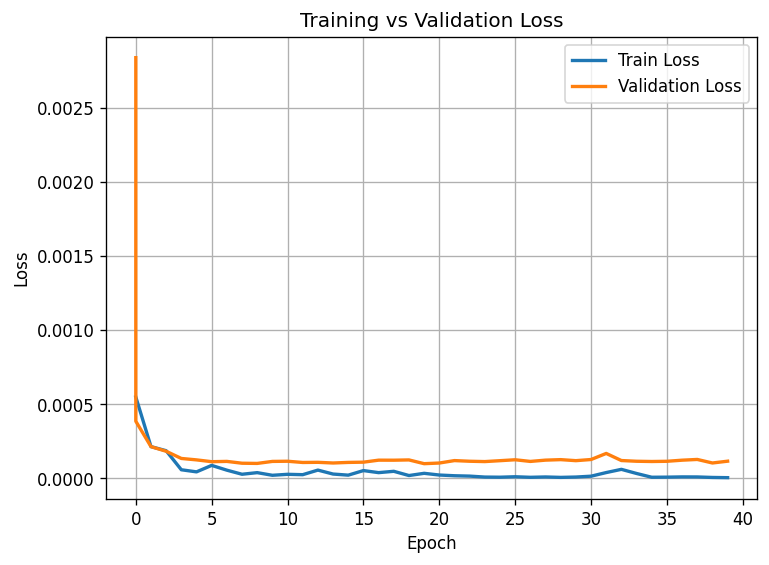


 Per-keypoint validation losses (best epoch):
midlegR1     0.000003
hindlegR1    0.000004
hindlegL1    0.000006
abdomen1     0.000024
thorax1      0.000029
midlegL1     0.000032
forelegR1    0.000045
forelegL1    0.000071
head1        0.000087
📊 Saved keypoint loss plot: models/drosophila_unet_64_251020_093034/keypoint_losses_20251020_1759.png


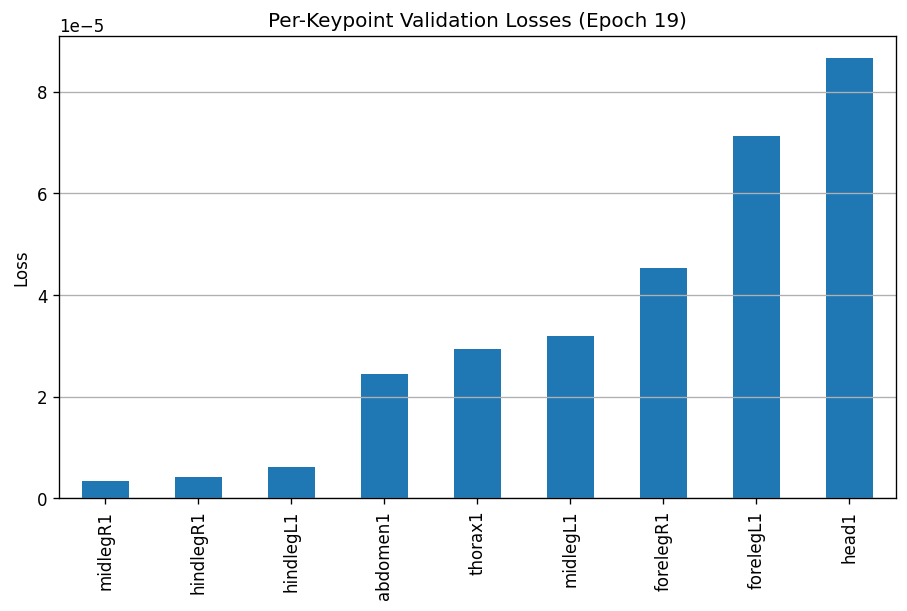


 Summary metrics saved to: models/drosophila_unet_64_251020_093034/summary_metrics.csv

 Done! Generated inside model folder:
  • loss_curve_*.png → Training curve
  • keypoint_losses_*.png → Per-keypoint bar plot
  • summary_metrics.csv → Numerical report


In [10]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# =========================================================
# CONFIGURATION
# =========================================================
MODELS_DIR = "models"   # parent folder containing model runs
SAVE_FIGS = True        # save generated figures
plt.rcParams.update({"figure.dpi": 120})

# =========================================================
# Locate latest model (by modification time)
# =========================================================
model_runs = sorted(glob.glob(os.path.join(MODELS_DIR, "*")), key=os.path.getmtime)
if not model_runs:
    raise FileNotFoundError("No model directories found in 'models/'. Check your path.")
latest_model = model_runs[-1]

# Handle nested folder issue (model inside model)
nested = os.path.join(latest_model, os.path.basename(latest_model))
if os.path.isdir(nested):
    print(f" Detected nested run folder, using: {nested}")
    latest_model = nested

print(f"\n Latest model directory: {latest_model}")

# =========================================================
# Load training log (training_log.csv)
# =========================================================
metrics_path = os.path.join(latest_model, "training_log.csv")
if not os.path.exists(metrics_path):
    raise FileNotFoundError(f"No training_log.csv found in {latest_model}")

df = pd.read_csv(metrics_path)
if "epoch" not in df.columns:
    raise ValueError("training_log.csv missing 'epoch' column; check SLEAP output")

print(f"\n Metrics loaded successfully ({len(df)} epochs).")
print(f"Columns: {list(df.columns)}")

# =========================================================
# Identify best epoch (minimum validation loss)
# =========================================================
best_idx = df["val_loss"].idxmin()
best_row = df.loc[best_idx]
best_epoch = int(best_row["epoch"])
best_val_loss = best_row["val_loss"]
best_train_loss = best_row["train_loss"]
loss_ratio = best_val_loss / best_train_loss if best_train_loss != 0 else None

print("\n Best Model Summary")
print(f"  • Epoch: {best_epoch}")
print(f"  • Validation Loss: {best_val_loss:.5f}")
print(f"  • Training Loss:   {best_train_loss:.5f}")
print(f"  • Val/Train Ratio: {loss_ratio:.3f} (≈1.0 ideal)\n")

# =========================================================
# Load evaluation metrics from .npz files
# =========================================================
train_npz = os.path.join(latest_model, "train_0_pred_metrics.npz")
val_npz = os.path.join(latest_model, "val_0_pred_metrics.npz")

def load_npz_metrics(npz_path, label):
    """Extract OKS, distance, and percentile metrics from SLEAP .npz result files (robust to nested dicts)."""
    if not os.path.exists(npz_path):
        return {}

    try:
        data = np.load(npz_path, allow_pickle=True)
    except Exception as e:
        print(f" Failed to read {npz_path}: {e}")
        return {}

    metrics = {}

    # 1️ Mean OKS (object keypoint similarity)
    if "mOKS.npy" in data.files or "mOKS" in data:
        moks = data["mOKS.npy"] if "mOKS.npy" in data.files else data["mOKS"]
        if isinstance(moks, np.ndarray):
            # unwrap nested dict if needed
            try:
                if moks.dtype == "O" and isinstance(moks.item(), dict):
                    moks = list(moks.item().values())
            except Exception:
                pass
            metrics[f"{label}_OKS_mAP"] = float(np.nanmean(moks))

    # 2 Distance metrics
    if "distance_metrics.npy" in data.files or "distance_metrics" in data:
        dist = data["distance_metrics.npy"] if "distance_metrics.npy" in data.files else data["distance_metrics"]
        if isinstance(dist, np.ndarray) and dist.dtype == "O":
            try:
                d = dist.item()
                if isinstance(d, dict):
                    for k in ["mean", "p50", "p90"]:
                        if k in d:
                            val = d[k]
                            # unwrap nested dicts or arrays
                            if isinstance(val, dict):
                                val = list(val.values())
                            metrics[f"{label}_{k if k!='mean' else 'avg'}_dist"] = float(np.nanmean(val))
            except Exception:
                pass

    # 3 Pose correctness (PCK)
    if "pck_metrics.npy" in data.files:
        pck = data["pck_metrics.npy"].item()
        if isinstance(pck, dict) and "mean" in pck:
            val = pck["mean"]
            if isinstance(val, dict):
                val = list(val.values())
            metrics[f"{label}_PCK_mean"] = float(np.nanmean(val))

    return metrics

extra_metrics = {}
extra_metrics.update(load_npz_metrics(train_npz, "train"))
extra_metrics.update(load_npz_metrics(val_npz, "val"))

if extra_metrics:
    print(" Evaluation metrics (.npz):")
    for k, v in extra_metrics.items():
        if not np.isnan(v):
            print(f"  • {k}: {v:.4f}")
else:
    print(" No valid .npz metrics detected (train_0_pred_metrics.npz / val_0_pred_metrics.npz).")

# =========================================================
# Estimate runtime (if available)
# =========================================================
runtime_sec = None
try:
    if "train_time" in df.columns and "val_time" in df.columns:
        runtime_sec = df["train_time"].sum() + df["val_time"].sum()
except Exception:
    pass

# =========================================================
# Plot training vs validation losses
# =========================================================
plt.figure(figsize=(7,5))
plt.plot(df["epoch"], df["train_loss"], label="Train Loss", linewidth=2)
plt.plot(df["epoch"], df["val_loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

if SAVE_FIGS:
    loss_fig_path = os.path.join(latest_model, f"loss_curve_{datetime.now().strftime('%Y%m%d_%H%M')}.png")
    plt.savefig(loss_fig_path, dpi=300, bbox_inches="tight")
    print(f" Saved loss curve: {loss_fig_path}")
plt.show()

# =========================================================
# Per-keypoint validation losses
# =========================================================
keypoint_cols = [c for c in df.columns if any(k in c for k in ["head", "thorax", "leg", "abdomen"])]

if keypoint_cols:
    best_keypoint_losses = df.loc[best_idx, keypoint_cols].sort_values()
    print("\n Per-keypoint validation losses (best epoch):")
    print(best_keypoint_losses.round(6).to_string())

    plt.figure(figsize=(9,5))
    best_keypoint_losses.plot.bar()
    plt.ylabel("Loss")
    plt.title(f"Per-Keypoint Validation Losses (Epoch {best_epoch})")
    plt.grid(True, axis='y')
    if SAVE_FIGS:
        kp_fig_path = os.path.join(latest_model, f"keypoint_losses_{datetime.now().strftime('%Y%m%d_%H%M')}.png")
        plt.savefig(kp_fig_path, dpi=300, bbox_inches="tight")
        print(f" Saved keypoint loss plot: {kp_fig_path}")
    plt.show()

# =========================================================
# Export summary metrics to CSV
# =========================================================
summary = {
    "model_dir": latest_model,
    "best_epoch": best_epoch,
    "val_loss": best_val_loss,
    "train_loss": best_train_loss,
    "val/train_ratio": loss_ratio,
    "runtime_sec": runtime_sec,
    "num_epochs": len(df),
    "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M")
}
summary.update(extra_metrics)

summary_df = pd.DataFrame([summary])
summary_csv_path = os.path.join(latest_model, "summary_metrics.csv")
summary_df.to_csv(summary_csv_path, index=False)

print(f"\n Summary metrics saved to: {summary_csv_path}")
print("\n Done! Generated inside model folder:")
print("  • loss_curve_*.png → Training curve")
print("  • keypoint_losses_*.png → Per-keypoint bar plot")
print("  • summary_metrics.csv → Numerical report")





If instead of bottom-up you've chosen the top-down pipeline (with two training configs), you would need to invoke two separate training jobs in sequence:

- `!sleap-train centroid.json colab.pkg.slp`
- `!sleap-train centered_instance.json colab.pkg.slp`


# Precictions Test Set

In [17]:
%%bash
# ============================================================
# STEP 1: DEFINE PATHS AND PARAMETERS
# ============================================================
MODEL_NAME="drosophila_unet_64_251020_093034"
BASE_DIR="/content/drive/MyDrive/sleap"
MODEL_DIR="${BASE_DIR}/models/${MODEL_NAME}"
VIDEO_PATH="${BASE_DIR}/fly1.2.mp4"

# Output paths (all inside model folder)
PREDICTIONS_DIR="${MODEL_DIR}/predictions"
mkdir -p "${PREDICTIONS_DIR}"

PRED_FILE="${PREDICTIONS_DIR}/fly1.2.predictions.slp"
RENDER_FILE="${PREDICTIONS_DIR}/fly1.2.tracked.mp4"

echo " Model directory: ${MODEL_DIR}"
echo " Input video: ${VIDEO_PATH}"
echo " Predictions output: ${PRED_FILE}"
echo " Rendered video output: ${RENDER_FILE}"

# ============================================================
# STEP 2: RUN INFERENCE (PREDICT ON VIDEO)
# ============================================================
# Correct modern SLEAP syntax:
sleap-track \
    "${VIDEO_PATH}" \
    --model "${MODEL_DIR}" \
    --output "${PRED_FILE}"

 Model directory: /content/drive/MyDrive/sleap/models/drosophila_unet_64_251020_093034
 Input video: /content/drive/MyDrive/sleap/fly1.2.mp4
 Predictions output: /content/drive/MyDrive/sleap/models/drosophila_unet_64_251020_093034/predictions/fly1.2.predictions.slp
 Rendered video output: /content/drive/MyDrive/sleap/models/drosophila_unet_64_251020_093034/predictions/fly1.2.tracked.mp4
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2025-10-20 10:41:07 | INFO | sleap_nn.predict:run_inference:319 | Started inference at: 2025-10-20 10:41:07.802319
2025-10-20 10:41:07 | INFO | sleap_nn.predict:run_inference:335 | Using device: cuda
Predicting... ━━━━━━━━━━━━━━ 100% 147/147 ETA: 0:00:00 Elapsed: 0:00:03 53.4 FPS
2025-10-20 10:41:11 | INFO | sleap_nn.predict:run_inference:453 | Finished inference at: 2025-10-20 10:41:11.691788
2025-10-20 10:41:11 | INFO | sleap_nn.predict:run_inference:454 | Total runtime: 3.8894846439361572 secs
2025-10-20 10:41:11 | INFO | sleap_nn.predict:run_infere

# Generate the Predictions Video

In [18]:
!ls -lh /content/drive/MyDrive/sleap/models/drosophila_unet_1_251019_094425/predictions


total 53K
-rw------- 1 root root 53K Oct 19 15:11 fly1.2.predictions.slp


In [19]:

%cd /content/drive/MyDrive/sleap/models/drosophila_unet_1_251019_094425/predictions   # Desired Model Directory (CHANGE HERE)
# The rendered video has bad quality compared to watching the predictions in the SLEAP GUI

!sleap-render fly1.2.predictions.slp \
  --video-index 0 \
  -o labeled_video.mp4 \
  --scale 1.0


/content/drive/MyDrive/sleap/models/drosophila_unet_1_251019_094425/predictions
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
Saving config: /root/.sleap/1.5.1/preferences.yaml
Video saved as: labeled_video.mp4
